In [55]:
import warnings
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
import cdlib
from cdlib import algorithms
from cdlib import ensemble as en
from cdlib import evaluation as evaluation
from cdlib import viz
warnings.filterwarnings('ignore')

In [4]:
def mesure_graph(DG):
    print('The Network DG has:\n Number of Nodes = ',DG.number_of_nodes(),'\n Number of Edges = ',DG.number_of_edges(),'\n')
    print('Average degree of "edges, links" = ',sum(dict(DG.degree()).values())/float(len(DG)))
    print('Is a Directed Network ?',DG.is_directed())

<a id="dataframe"></a>
### Dataframe for Direct and Undirect graph ([to top](#top))

### Data for Direct graph

In [9]:
df = pd.read_csv("scraping data/data/data_subreddit_direct.csv",index_col=0)

df1=df.copy()
#delete the columns 
#columns2remove = ['date']
#df.drop(columns2remove, inplace=True, axis=1)
df.head()


,parent,to,interactions,crossposts,date,weights
0,nature,environment,1746.0,1,1.619228e+09,7.465655
1,nature,EcoNewsNetwork,154.0,13,1.615282e+09,5.043425
2,nature,PublicLands,3.0,1,1.619177e+09,1.386294
3,nature,EndangeredSpecies,28.0,2,1.618449e+09,3.367296
4,nature,animalimpact,5.0,3,1.615263e+09,1.791759


### Data for Undirect graph

In [10]:
dfg = pd.read_csv("scraping data/data/data_subreddit_Undirect.csv",index_col=0)

dfg1=dfg.copy()
#delete the columns 
#columns2remove = ['date']
#dfg.drop(columns2remove, inplace=True, axis=1)
dfg.head()


,parent,to,interactions,crossposts,date,weights
0,nature,environment,1965.0,3,1.609549e+09,7.583756
1,nature,EcoNewsNetwork,292.0,18,1.615282e+09,5.680173
2,nature,PublicLands,3.0,1,1.619177e+09,1.386294
3,nature,EndangeredSpecies,28.0,2,1.618449e+09,3.367296
4,nature,animalimpact,5.0,3,1.615263e+09,1.791759


### Undirected Graph
The name of indirected Graph is "g"

In [17]:
g=[]
g = nx.from_pandas_edgelist(df, source='parent', target='to',
                                     edge_attr=['crossposts', 'weights'],
                                     create_using=nx.Graph())
mesure_graph(g)

The Network DG has:
 Number of Nodes =  24819 
 Number of Edges =  104284 

Average degree of "edges, links" =  8.403561787340344
Is a Directed Network ? False


### Directed Graph
The name of indirected Graph is "dg"

In [19]:
dg=[]

dg = nx.from_pandas_edgelist(df, source='parent', target='to',
                                     edge_attr=['crossposts', 'weights'],
                                     create_using=nx.DiGraph)
mesure_graph(dg)

The Network DG has:
 Number of Nodes =  24819 
 Number of Edges =  107094 

Average degree of "edges, links" =  8.63000120875136
Is a Directed Network ? True


### Read Comunity Louvain

In [22]:
from cdlib import algorithms, readwrite
louv_coms = algorithms.louvain(g, weight='crossposts',resolution=0.9,randomize=True)
#readwrite.read_community_csv(louv_coms, "louv_coms.csv", ",", str)
#readwrite.read_community_json(louv_coms_js, "louv_coms_js.json")


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

Clustering algorithm name is Louvain 

Clustering parameters {'weight': 'crossposts', 'resolution': 0.9, 'randomize': True}
Identified Clustering with "Louvain", 

Wehter the clustering is overlapping or not =  False 

Percentage of nodes covered by the clustering =  1.0 



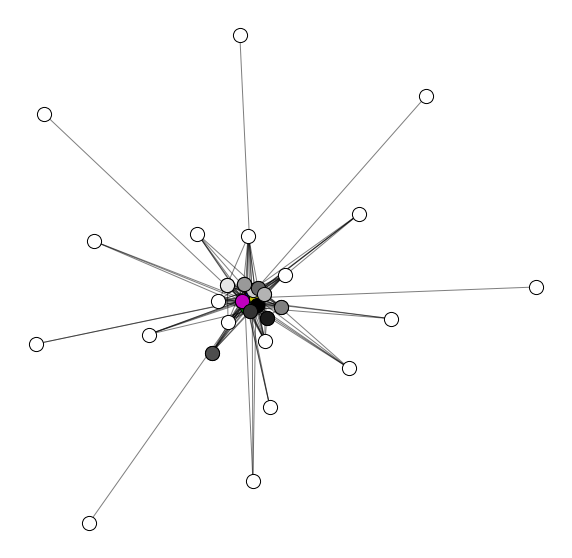

In [30]:
louv_coms = algorithms.louvain(g, weight='crossposts',resolution=0.9,randomize=True)

print('Clustering algorithm name is',louv_coms.method_name,'\n') 
print('Clustering parameters',louv_coms.method_parameters)
print('Identified Clustering with "Louvain", \n')

louv_clusters=louv_coms.communities 
louv_clusters
print('Wehter the clustering is overlapping or not = ',louv_coms.overlap,'\n') 
print('Percentage of nodes covered by the clustering = ',louv_coms.node_coverage,'\n') 

louv_comunity_js=louv_coms.to_json()

viz.plot_community_graph(g, louv_coms, figsize=(10, 10))

### Louvain
Clustering Evaluation (Fitness functions)

In [31]:
louv_fit=louv_coms.average_internal_degree()
print('Internal degree:\n',louv_fit)
louv_in_degree=louv_coms.average_internal_degree(summary=False)
print('\n Average Internal grade comunities with Louvain: \n\n',louv_in_degree)

Internal degree:
 FitnessResult(min=1.0, max=7.7177848775292865, score=3.0220906878576685, std=1.530436444759111)

 Average Internal grade comunities with Louvain: 

 [5.148405560098119, 5.329976303317536, 4.283005617977528, 5.203476886606085, 5.2704611549646865, 7.7177848775292865, 3.659738260200154, 5.962790697674419, 2.383939774153074, 3.366412213740458, 4.118491921005386, 3.4661654135338344, 2.4376278118609407, 2.595744680851064, 2.3781512605042017, 2.4324324324324325, 2.5028571428571427, 4.363636363636363, 2.2142857142857144, 3.381818181818182, 2.051282051282051, 2.0555555555555554, 2.75, 1.8666666666666667, 2.533333333333333, 1.8333333333333333, 1.8181818181818181, 2.0, 1.7142857142857142, 1.6666666666666667, 1.6666666666666667, 1.6, 1.5, 1.5, 1.0]


#### Plot the communities top_k=10 


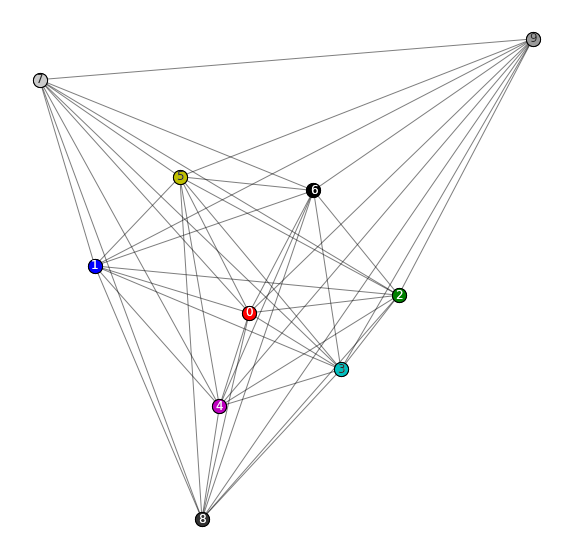

In [33]:
viz.plot_community_graph(g,louv_coms, figsize=(10, 10),
                        plot_labels=True,top_k=10)


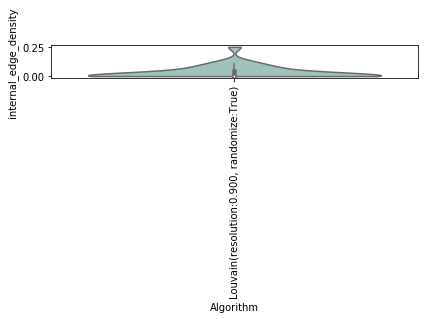

In [35]:
viz.plot_com_stat(louv_coms,evaluation.internal_edge_density)

size Vs. Internal edge density


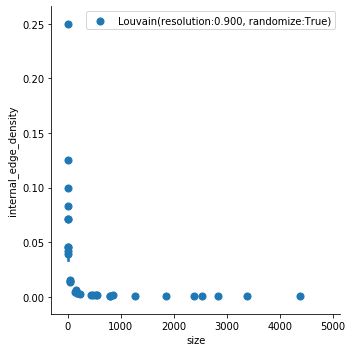

In [37]:
print('size Vs. Internal edge density')
viz.plot_com_properties_relation(louv_coms, evaluation.size, evaluation.internal_edge_density)

size Vs. Conductance


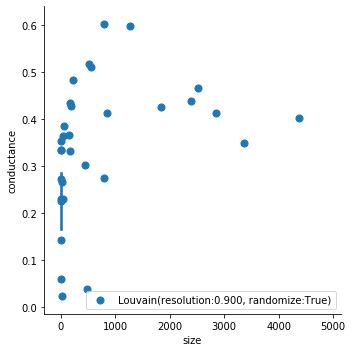

In [38]:
print('size Vs. Conductance')
viz.plot_com_properties_relation(louv_coms, evaluation.size, evaluation.conductance)

Internal edge density Vs. Conductance


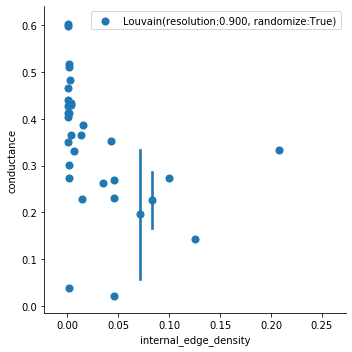

In [40]:
print('Internal edge density Vs. Conductance')
viz.plot_com_properties_relation(louv_coms, evaluation.internal_edge_density,evaluation.conductance)

In [49]:
first_cluster=louv_clusters[0]
second_cluster=louv_clusters[1]
third_cluster=louv_clusters[2]
len(louv_cluster)

In [51]:
len(louv_clusters)

35

NameError: name 'louv_cluster' is not defined

In [59]:
print('Internal degree average\n',evaluation.average_internal_degree(g,louv_coms))

Internal degree average
 FitnessResult(min=1.0, max=7.7177848775292865, score=3.0220906878576685, std=1.530436444759111)


In [61]:
print('Conductance\n',evaluation.conductance(g,louv_coms))

Conductance
 FitnessResult(min=0.022222222222222223, max=0.6034230849509497, score=0.33303377218927227, std=0.14253646195864475)


In [63]:
print('erdos_renyi_modularity:\n',evaluation.erdos_renyi_modularity(g,louv_coms))

erdos_renyi_modularity:
 FitnessResult(min=None, max=None, score=0.46966088198654404, std=None)


In [65]:
print('Newman girvan modularity:\n',evaluation.newman_girvan_modularity(g,louv_coms))

Newman girvan modularity:
 FitnessResult(min=None, max=None, score=0.4578577949664784, std=None)


In [69]:
print('Maximum fraction of edges of a node of a community that point outside the community itself.\n',evaluation.max_odf(g,louv_coms,summary=False))

Maximum fraction of edges of a node of a community that point outside the community itself.
 [1236, 612, 631, 907, 1242, 638, 1296, 136, 413, 156, 152, 423, 5, 23, 81, 47, 77, 31, 28, 15, 12, 8, 1, 5, 7, 7, 2, 1, 2, 3, 1, 3, 1, 1, 1]


In [76]:
hub_domi=evaluation.hub_dominance(g,louv_coms)
print('Hub_dominants\n',hub_domi)

Hub_dominants
 FitnessResult(min=0.0778688524590164, max=1.0, score=0.482949739604533, std=0.3054207456948439)


In [80]:
sz = evaluation.size(g,louv_coms)
print('size of nodes for comunity \n',sz)

size of nodes for comunity 
 FitnessResult(min=2, max=4892, score=709.1142857142858, std=1151.816423156512)


In [83]:
print('Fraction of community nodes that belong to a triad.\n',evaluation.triangle_participation_ratio(g,louv_coms))

Fraction of community nodes that belong to a triad.
 FitnessResult(min=0.0, max=0.4984025559105431, score=0.19805110769281026, std=0.16437620333304176)


### Explore Communities

In [90]:
for i in range(len(louv_clusters)):
    print('size Community=',i,'', len(louv_clusters[i]))

size Community= 0  4892
size Community= 1  3376
size Community= 2  2848
size Community= 3  2531
size Community= 4  2407
size Community= 5  1878
size Community= 6  1299
size Community= 7  860
size Community= 8  797
size Community= 9  786
size Community= 10  557
size Community= 11  532
size Community= 12  489
size Community= 13  423
size Community= 14  238
size Community= 15  185
size Community= 16  175
size Community= 17  165
size Community= 18  140
size Community= 19  55
size Community= 20  39
size Community= 21  36
size Community= 22  16
size Community= 23  15
size Community= 24  15
size Community= 25  12
size Community= 26  11
size Community= 27  8
size Community= 28  7
size Community= 29  6
size Community= 30  6
size Community= 31  5
size Community= 32  4
size Community= 33  4
size Community= 34  2


### Analise the firts 3 comunities

In [95]:

bool_serie=dfg[dfg['parent']==first_cluster or dfg['to']==first_cluster]
    

ValueError: Lengths must match to compare

In [93]:
 first_cluster[0]

'sharks'